<h1>Quiz 1 : Pemahaman ALgoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana Process algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari Algoritma KNN?

1. - Tentukan jumlah tetangga yang akan dihitung (k)
   - Ukur jarak tetangga terhadap objek, kemudian urutkan dari yang tedekat
   - Ambil k tetangga terdekat, kemudian hitung mana yang dominan
2. - Sangat sensitif terhadap data pencilan
   - Jika k nya genap, KNN bingung jika jumlah tetangga terdekat sama

<h1>Quiz 2 : Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparaeter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot ke dua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])
df.tail()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  proline  class  
173                          1.74    740.0    2.0  
174                          1.56    750.0    2.0  
175                          1.56    835.0    2.0  
176                          1.62    840.0    2.0  
177                          1.60    560.0    2.0

In [2]:
#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

In [3]:
from scipy import stats

z = stats.zscore(df)

print(np.where(z>3))

(array([ 25,  69,  73,  95, 110, 115, 121, 121, 123, 158]), array([ 2,  4,  3,  4,  8, 10,  2,  6,  1,  9]))


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

k_list = np.arange(2, 21)

In [6]:
# uniform score
uniform_score = []

for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    uniform_score.append(score)

In [7]:
# distance score
distance_score = []

for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    distance_score.append(score)

In [8]:
print('uniform score ->', uniform_score)
print('distance score ->', distance_score)

uniform score -> [0.6944444444444444, 0.8055555555555556, 0.7222222222222222, 0.6666666666666666, 0.6388888888888888, 0.75, 0.6388888888888888, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112]
distance score -> [0.75, 0.8333333333333334, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


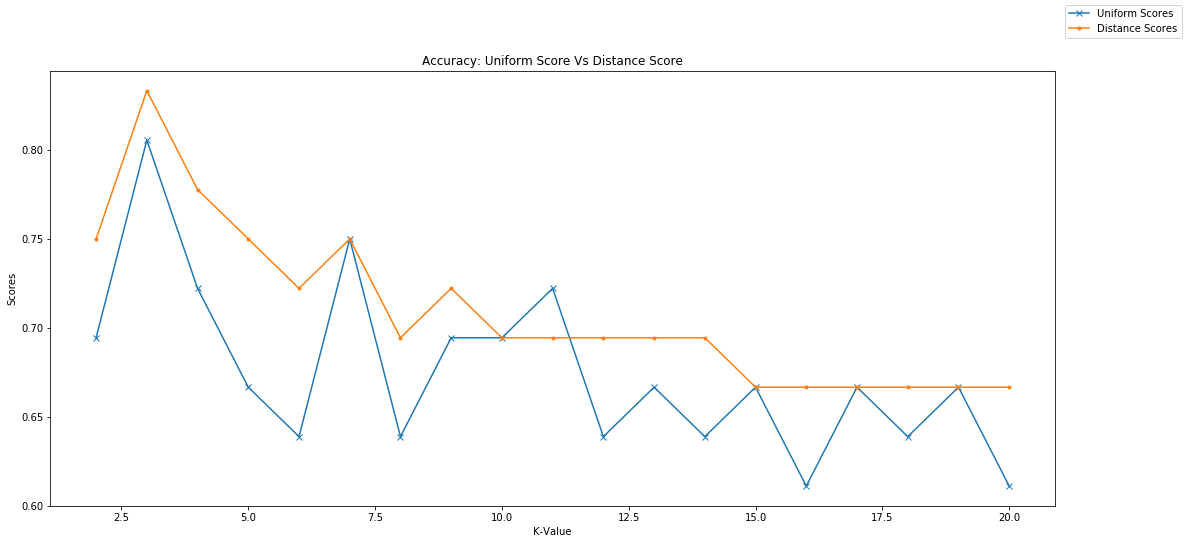

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))

ax.plot(k_list, uniform_score, marker='x', label='Uniform Scores')
ax.plot(k_list, distance_score, marker='.', label='Distance Scores')

ax.set_title('Accuracy: Uniform Score Vs Distance Score')
ax.set_xlabel('K-Value')
ax.set_ylabel('Scores')

fig.legend()
plt.style.use('ggplot')
plt.show()

Contoh hasil yang di harapkan :

Uniform Scores -> [0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]
 
 distance scores -> [0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

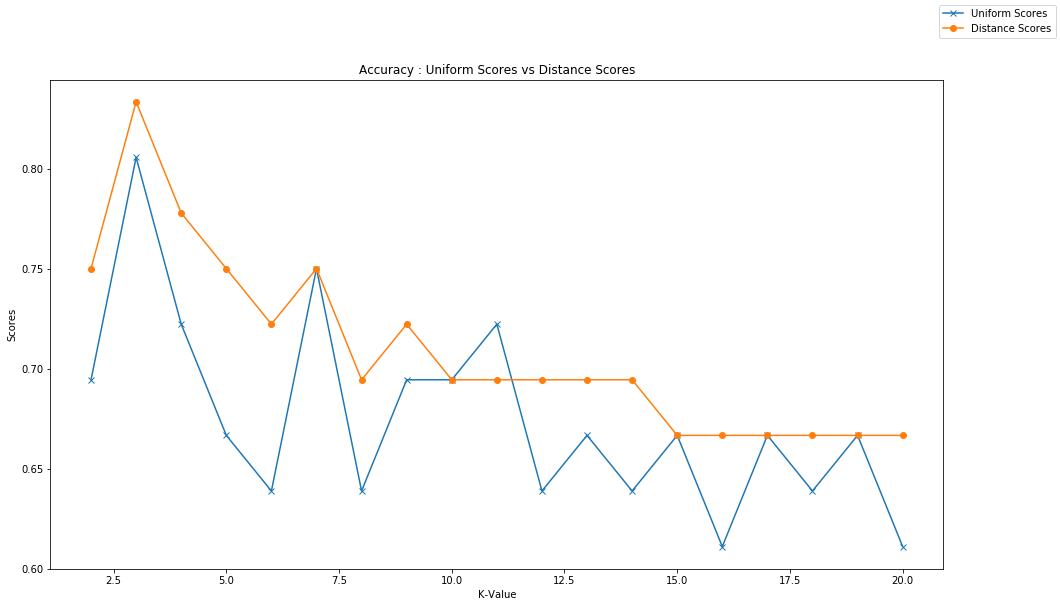

<h1>Quiz 3 : Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [10]:
rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_predic = model.predict(X)

In [22]:
coef = model.coef_
print('Koefisien :', coef)

koefisien : [ 1.5 -5.   9.  10. ]


In [23]:
intercept = model.intercept_
print('Intecept :', intercept)

Intecept : 0.5000000016247412
